## Import packages

In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['pdf.fonttype']=42
# sys.path.append("/home/x-wding2/Projects/Github/PyComplexHeatmap")
import PyComplexHeatmap as pch
print(pch.__version__)
import czip

1.6.2


## Between groups DMRs

In [2]:
palette_path=os.path.expanduser("~/Projects/mouse_pfc/metadata/mpfc_color_palette.xlsx")
cell_class_colors=pd.read_excel(palette_path,sheet_name='CellClass',index_col=0).Hex.to_dict()
cell_class_colors['Multi']='grey'
cell_class_colors

{'NonN': '#E06931',
 'Exc': '#5EC5A9',
 'RG': '#6036CB',
 'Inh': '#E93400',
 'Multi': 'grey'}

In [3]:
delta=0.3

df_row = pd.read_csv(os.path.expanduser("~/Projects/mouse_pfc/pseudo_cell/CellClass/between_groups_dmr/methylpy/methylpy_rms_results_collapsed.tsv"), sep='\t', index_col=[0, 1, 2])
df_row.columns = [col.lstrip('methylation_level_') if col.startswith(
    'methylation_level_') else col
                  for col in df_row.columns.tolist()]
df_row.rename(columns={'hypomethylated_samples': 'Samples',
                       'number_of_dms': 'N'}, inplace=True)
df_row.drop('hypermethylated_samples', axis=1, inplace=True)
snames = df_row.columns.tolist()[2:]
a = df_row.loc[:, snames].values
df_row.insert(2, 'Delta', np.max(a, axis=1) - np.min(a, axis=1))
df_row = df_row.loc[~ df_row.Samples.isna()]
df_row = df_row.loc[df_row.Delta >= delta]
df_row = df_row.loc[:, ['Samples', 'N', 'Delta']]
df_row.Samples = df_row.Samples.apply(lambda x: x if ',' not in x else 'Multi')
df_row.reset_index(inplace=True)
df_row.start = df_row.start - 1
cols = df_row.columns.tolist()
df_row.set_index(cols[:3], inplace=True)
print("Reading and processing data..")
data = pd.read_csv(os.path.expanduser("~/Projects/mouse_pfc/pseudo_cell/CellClass/between_groups_dmr/methylpy/dmr.major_type.beta.txt"), sep='\t', index_col=[0, 1, 2])
common_rows = list(set(df_row.index.tolist()) & set(data.index.tolist()))
print("Reading and processing df_col..")
df_col = pd.read_csv(os.path.expanduser("~/Projects/mouse_pfc/5kb_mC_hic_clustering/L2/major_type_to_cell_class.tsv"), sep='\t', index_col=0)
common_cols = list(set(df_col.index.tolist()) & set(data.columns.tolist()))
df_row = df_row.loc[common_rows]
df_col = df_col.loc[common_cols]
cell_type_col = df_col.columns.tolist()[0]
df_row = df_row.loc[df_row.N >= 2]
df_row = df_row.loc[df_row.Samples != 'Multi']
data = data.loc[df_row.index.tolist(), df_col.index.tolist()]
print(data.shape)

Reading and processing data..
Reading and processing df_col..
(258365, 23)


In [4]:
df_row

Samples   N     Delta
#chr  start     end                            
chr14 25667890  25667923      Exc   2  0.649934
chr5  70893110  70893122     NonN   2  0.333501
chr3  141598191 141598238      RG   2  0.440745
chr1  76086002  76086015       RG   2  0.319716
chr9  16231701  16232342       RG   8  0.444616
...                           ...  ..       ...
chr11 75550115  75550656       RG   6  0.547601
      109751156 109751187      RG   3  0.530203
chr3  68823498  68825391       RG  29  0.451270
chr10 91354668  91354926       RG   7  0.327058
chr9  74147749  74150162       RG  31  0.541438

[258365 rows x 3 columns]

In [5]:
df_col

CellClass1
MajorType             
CT-L6              Exc
CGE-Lamp5          Inh
IT-L23             Exc
PC                NonN
RG-3                RG
MGC               NonN
NP-L6              Exc
ODC               NonN
RG-4                RG
CGE-Vip            Inh
IT-L6              Exc
MGE-Sst            Inh
OPC               NonN
VLMC              NonN
IT-L4              Exc
Exc-Unknown        Exc
RG-1                RG
ET-L5              Exc
EC                NonN
MGE-Pvalb          Inh
VLMC-Pia          NonN
RG-2                RG
ASC               NonN

In [6]:
data

CT-L6  CGE-Lamp5    IT-L23        PC      RG-3  \
chrom start     end                                                            
chr14 25667890  25667923   0.077450   0.233350  0.161600  0.733500  0.685500   
chr5  70893110  70893122   0.903500   0.899000  0.896500  0.637500  0.784500   
chr3  141598191 141598238  0.491350   0.192500  0.623500  0.055500  0.332150   
chr1  76086002  76086015   0.797500   0.508500  0.773500  0.050000  0.610500   
chr9  16231701  16232342   0.780000   0.807875  0.725875  0.630500  0.318250   
...                             ...        ...       ...       ...       ...   
chr11 75550115  75550656   0.839000   0.557333  0.631000  0.780667  0.171233   
      109751156 109751187  0.687667   0.452667  0.457667  0.241333  0.154667   
chr3  68823498  68825391   0.753267   0.363077  0.607967  0.644540  0.257347   
chr10 91354668  91354926   0.784857   0.809286  0.508857  0.859286  0.650714   
chr9  74147749  74150162   0.859394   0.860788  0.766576  0.678030  0.443909   

                                MGC     NP-L6       ODC      RG-4   CGE-Vip  \
chrom start     end                                                           
chr14 25667890  25667923   0.628000  0.148000  0.468000  0.785000  0.662500   
chr5  70893110  70893122   0.323000  0.947500  0.743500  0.844000  0.961500   
chr3  141598191 141598238  0.763500  0.464500  0.448000  0.200150  0.549500   
chr1  76086002  76086015   0.802000  0.869500  0.523500  0.572500  0.572000   
chr9  16231701  16232342   0.900750  0.807750  0.378837  0.209437  0.654000   
...                             ...       ...       ...       ...       ...   
chr11 75550115  75550656   0.262050  0.886500  0.492667  0.159800  0.520667   
      109751156 109751187  0.546333  0.629667  0.325667  0.058667  0.503333   
chr3  68823498  68825391   0.775067  0.890267  0.517487  0.184007  0.594700   
chr10 91354668  91354926   0.823286  0.763286  0.614143  0.339714  0.615143   
chr9  74147749  74150162   0.813273  0.867061  0.658548  0.311152  0.854182   

                           ...      VLMC     IT-L4  Exc-Unknown      RG-1  \
chrom start     end        ...                                              
chr14 25667890  25667923   ...  0.780000  0.092500     0.125000  0.849000   
chr5  70893110  70893122   ...  0.499000  0.926000     1.000000  0.846500   
chr3  141598191 141598238  ...  0.377950  0.517000     0.583500  0.458500   
chr1  76086002  76086015   ...  0.050000  0.887000     0.778000  0.396500   
chr9  16231701  16232342   ...  0.526500  0.579750     0.715875  0.133525   
...                        ...       ...       ...          ...       ...   
chr11 75550115  75550656   ...  0.726833  0.683833     0.698000  0.231500   
      109751156 109751187  ...  0.321000  0.588000     0.709000  0.034133   
chr3  68823498  68825391   ...  0.720740  0.763000     0.750800  0.495783   
chr10 91354668  91354926   ...  0.859000  0.469000     0.742857  0.466571   
chr9  74147749  74150162   ...  0.765485  0.813455     0.846697  0.434000   

                              ET-L5        EC  MGE-Pvalb  VLMC-Pia      RG-2  \
chrom start     end                                                            
chr14 25667890  25667923   0.043500  0.839500   0.735500  0.822500  0.694000   
chr5  70893110  70893122   0.954500  0.489500   0.883500  0.598000  0.884000   
chr3  141598191 141598238  0.419500  0.633500   0.775000  0.299000  0.082350   
chr1  76086002  76086015   0.826500  0.797500   0.697500  0.145450  0.562500   
chr9  16231701  16232342   0.605375  0.663125   0.666375  0.545250  0.307337   
...                             ...       ...        ...       ...       ...   
chr11 75550115  75550656   0.830000  0.781667   0.631667  0.909000  0.222417   
      109751156 109751187  0.859333  0.360333   0.684667  0.414333  0.081200   
chr3  68823498  68825391   0.471317  0.777000   0.901467  0.657633  0.362270   
chr10 91354668  91354926   0.851714  0.807286   0.798000  0.913429  0.423857   

In [7]:
col_order=[]
for cc in ['RG','Exc','Inh','NonN']:#df_cols.CellClass.unique():
    cols=df_col.loc[df_col.CellClass1==cc].index.tolist()
    dendrogram_col=pch.clustermap.DendrogramPlotter(
            data.loc[:,cols],
            linkage=None,axis=1,label=False,rotate=False
        )
    col_order.extend(dendrogram_col.dendrogram["ivl"])
df_col=df_col.loc[col_order]

In [8]:
# row_order=[]
# for cc in ['RG','Exc','Inh','NonN']+['Multi']:
#     print(cc)
#     rows=df_row.loc[df_row.Samples==cc].index.tolist()
#     if len(rows)<=1:
#         row_order.extend(rows)
#         continue
#     dendrogram_row=pch.clustermap.DendrogramPlotter(
#             data.loc[rows],
#             linkage=None,axis=0,label=False,rotate=True
#         )
#     row_order.extend(dendrogram_row.dendrogram["ivl"])
# len(row_order)
# df_row=df_row.loc[row_order]
df_row.sort_values('Samples',inplace=True)
data=data.loc[df_row.index.tolist(),df_col.index.tolist()]

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 23.6375 mm


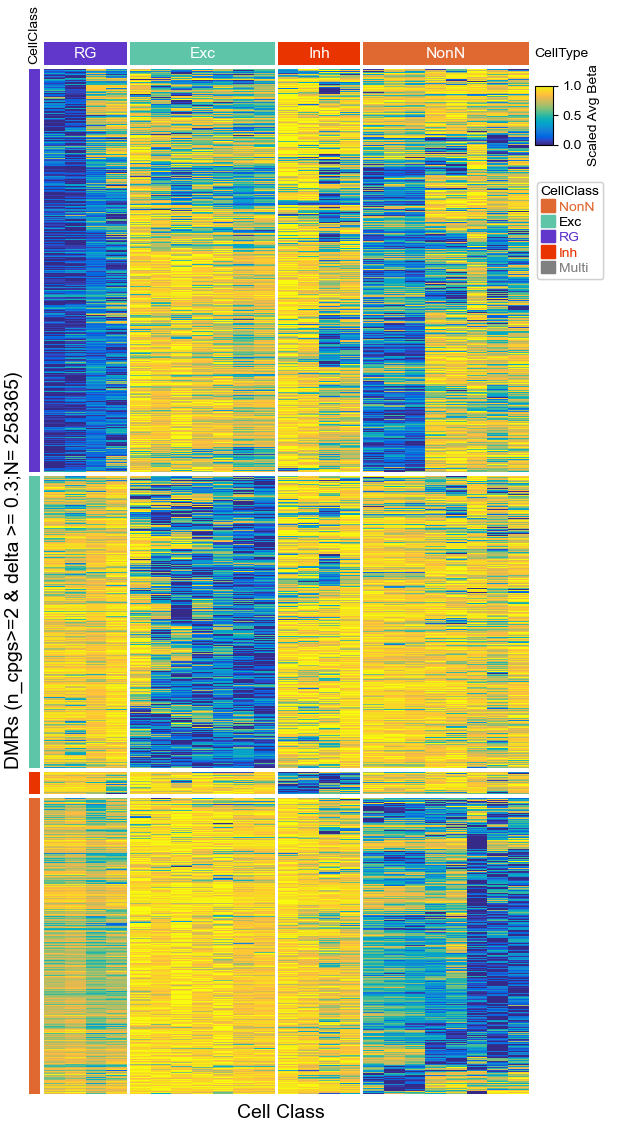

In [10]:
row_ha = pch.HeatmapAnnotation(
    CellClass=pch.anno_simple(df_row.Samples, colors=cell_class_colors,
                             rasterized=True,
                             # add_text=True,
                             # text_kws=dict(color='black')
                             ),
    axis=0)
colors = row_ha.annotations[0].color_dict.copy()
if 'Multi' in colors:
    del colors['Multi']

col_ha = pch.HeatmapAnnotation(
    # label=pch.anno_label(df_col[cell_type_col],
    #                         merge=True, rotation=15,
    #                      colors=colors),
    CellType=pch.anno_simple(df_col[cell_type_col],
                             add_text=True, colors=colors,
                             legend=False, height=5,
                             text_kws=dict(
                                 weight='bold'
                             )),
    axis=1)


plt.figure(figsize=(6.5, 12))
cm = pch.ClusterMapPlotter(data=data, top_annotation=col_ha,
                           left_annotation=row_ha, 
                           row_cluster=True,col_cluster=False,
                           standard_scale=0,
                           show_rownames=False, show_colnames=False,
                           row_dendrogram=False, col_dendrogram=False,
                           row_split=df_row.Samples,
                           col_split=df_col[cell_type_col],
                           col_split_order=['RG','Exc','Inh','NonN'],
                           row_split_order=['RG','Exc','Inh','NonN'],
                           cmap='parula', rasterized=True, label='Scaled Avg Beta',
                           row_split_gap=1, col_split_gap=0.8, legend_gap=8,
                           xlabel='Cell Class', legend_hpad=0,
                           ylabel=f"DMRs (n_cpgs>=2 & delta >= 0.3;N= {data.shape[0]})",
                           xlabel_kws=dict(color='black', fontsize=14, labelpad=0),
                           ylabel_kws=dict(color='black', fontsize=14, labelpad=0),
                           # increace labelpad manually using labelpad (points)
                           # xlabel_bbox_kws=dict(facecolor='chocolate'),xlabel_side='top',
                           )
# cm.ax.set_title("Beta", y=1.03, fontdict={'fontweight': 'bold'})
plt.savefig("between_groups_dmr.pdf", bbox_inches='tight')
plt.show()

## Within groups DMRs

In [2]:
if not os.path.exists("df_rows.txt"):
    df_rows=None
    for ct in os.listdir("within_groups_dmr/methylpy"):
        print(ct)
        df=pd.read_csv(os.path.join("within_groups_dmr/methylpy",ct,f"{ct}_heatmap.pdf.rows.txt"),sep='\t')
        df['Group']=ct
        df.drop(['Delta','N'],axis=1,inplace=True)
        if df_rows is None:
            df_rows=df.copy()
        else:
            df_rows=pd.concat([df_rows,df])
    cols=df_rows.columns.tolist()
    df_rows=df_rows.groupby(cols[:3]).agg(lambda x:x.tolist())
    for col in ['Samples','Group']:
        df_rows[col]=df_rows[col].apply(lambda x:x[0] if len(x)==1 else 'Multi')
    df_rows.rename(columns={'Samples':'MajorType','Group':'CellClass'},inplace=True)
    df_rows.to_csv("df_rows.txt",sep='\t')
    czip.agg_beta(Query="df_rows.txt",Matrix="/home/x-wding2/Projects/mouse-pfc/pseudo_cell/MajorType/matrix/major_type.beta.bed.gz",
              Outfile="data.txt",methylpy=False)
else:
    df_rows=pd.read_csv('df_rows.txt',sep='\t',index_col=[0,1,2])
df_rows

MajorType CellClass
#chr start    end                         
chr1 3013471  3013579        MGC      NonN
     3026186  3026310        MGC      NonN
     3035862  3035927       VLMC      NonN
     3052666  3052823        MGC      NonN
     3059277  3059436         PC      NonN
...                          ...       ...
chrY 44290504 44290637       MGC      NonN
     66427102 66427179       OPC      NonN
     90367464 90367503       MGC      NonN
     90732358 90732367       MGC      NonN
     90792411 90792447  VLMC-Pia      NonN

[661968 rows x 2 columns]

In [3]:
df_rows.MajorType.unique(),df_rows.CellClass.unique()

(array(['MGC', 'VLMC', 'PC', 'IT-L4', 'IT-L23', 'MGE-Pvalb', 'RG-1',
        'CGE-Lamp5', 'RG-2', 'ASC', 'Multi', 'RG-4', 'CT-L6', 'ODC', 'OPC',
        'VLMC-Pia', 'CGE-Vip', 'EC', 'MGE-Sst', 'IT-L6', 'NP-L6', 'ET-L5',
        'RG-3', 'Exc-Unknown'], dtype=object),
 array(['NonN', 'Exc', 'Inh', 'RG', 'Multi'], dtype=object))

In [4]:
df_cols=pd.read_csv("~/Projects/mouse-pfc/5kb_mC_hic_clustering/L2/major_type_to_cell_class.tsv",sep='\t',index_col=0)
df_cols.rename(columns={'CellClass1':'CellClass'},inplace=True)
df_cols['MajorType']=df_cols.index.tolist()
df_cols.index.name='MT'
df_cols

CellClass    MajorType
MT                                
EC               NonN           EC
RG-2               RG         RG-2
IT-L4             Exc        IT-L4
RG-3               RG         RG-3
RG-4               RG         RG-4
RG-1               RG         RG-1
ODC              NonN          ODC
MGC              NonN          MGC
CT-L6             Exc        CT-L6
OPC              NonN          OPC
PC               NonN           PC
CGE-Lamp5         Inh    CGE-Lamp5
CGE-Vip           Inh      CGE-Vip
ASC              NonN          ASC
MGE-Pvalb         Inh    MGE-Pvalb
Exc-Unknown       Exc  Exc-Unknown
IT-L23            Exc       IT-L23
MGE-Sst           Inh      MGE-Sst
VLMC             NonN         VLMC
ET-L5             Exc        ET-L5
VLMC-Pia         NonN     VLMC-Pia
NP-L6             Exc        NP-L6
IT-L6             Exc        IT-L6

In [5]:
data=pd.read_csv("data.txt",index_col=[0,1,2],sep='\t')
common_rows=list(set(df_rows.index.tolist()) & set(data.index.tolist()))
data=data.loc[common_rows]
df_rows=df_rows.loc[common_rows]
data

ASC  CGE-Lamp5   CGE-Vip     CT-L6        EC  \
chrom start     end                                                           
chr9  28963217  28963260   0.83350   0.923000  0.954500  0.939000  0.507000   
chr4  32158998  32159443   0.78950   0.524500  0.791500  0.767750  0.759500   
chr13 90011452  90011460   0.29100   0.222000  0.896500  0.225000  0.228500   
chr10 126765779 126765801  0.81850   0.885000  0.903000  0.909000  0.565000   
chr5  142126735 142126952  0.84475   0.961500  0.959250  0.902000  0.706500   
...                            ...        ...       ...       ...       ...   
      21947352  21947371   0.67700   0.261333  0.766667  0.953667  0.979333   
chr6  50328671  50328782   0.38975   0.316650  0.702250  0.820000  0.662500   
chr12 15047867  15047932   0.68650   0.750000  0.825000  0.777500  0.266500   
chr8  48317445  48317685   0.87640   0.938400  0.926000  0.937200  0.596000   
chr2  93512302  93512369   0.31350   0.788000  0.581000  0.832500  0.604500   

                             ET-L5  Exc-Unknown    IT-L23     IT-L4    IT-L6  \
chrom start     end                                                            
chr9  28963217  28963260   0.89900     0.833500  0.738500  0.847000  0.95450   
chr4  32158998  32159443   0.73275     0.791750  0.777000  0.693250  0.79225   
chr13 90011452  90011460   0.08115     0.476500  0.009400  0.329500  0.32350   
chr10 126765779 126765801  0.87500     0.875000  0.894000  0.899000  0.93750   
chr5  142126735 142126952  0.94350     0.781250  0.738500  0.530250  0.97100   
...                            ...          ...       ...       ...      ...   
      21947352  21947371   0.93500     0.897333  0.613667  0.864333  0.89500   
chr6  50328671  50328782   0.85425     0.458000  0.662250  0.608250  0.81025   
chr12 15047867  15047932   0.31450     0.775000  0.874500  0.906000  0.65700   
chr8  48317445  48317685   0.66820     0.844600  0.885600  0.746000  0.80600   
chr2  93512302  93512369   0.94450     0.937500  0.900500  0.890000  0.90750   

                           ...     NP-L6      ODC       OPC        PC  \
chrom start     end        ...                                          
chr9  28963217  28963260   ...  0.966500  0.80500  0.769500  0.731000   
chr4  32158998  32159443   ...  0.441325  0.69625  0.538750  0.667000   
chr13 90011452  90011460   ...  0.231000  0.30700  0.390500  0.402500   
chr10 126765779 126765801  ...  0.906000  0.68550  0.721500  0.649000   
chr5  142126735 142126952  ...  0.933250  0.82150  0.774000  0.728250   
...                        ...       ...      ...       ...       ...   
      21947352  21947371   ...  0.950667  0.75200  0.733333  0.855667   
chr6  50328671  50328782   ...  0.889500  0.61000  0.592250  0.047500   
chr12 15047867  15047932   ...  0.867500  0.71350  0.591000  0.290500   
chr8  48317445  48317685   ...  0.880800  0.90840  0.804800  0.765800   
chr2  93512302  93512369   ...  0.956500  0.32550  0.232700  0.221000   

                               RG-1     RG-2      RG-3      RG-4  VLMC-Pia  \
chrom start     end                                                          
chr9  28963217  28963260   0.752500  0.81300  0.760000  0.650500  0.772500   
chr4  32158998  32159443   0.391250  0.46975  0.616500  0.479250  0.704750   
chr13 90011452  90011460   0.782000  0.06915  0.314500  0.285500  0.812000   
chr10 126765779 126765801  0.783500  0.80050  0.738500  0.793500  0.809500   
chr5  142126735 142126952  0.869750  0.87600  0.796500  0.863000  0.842750   
...                             ...      ...       ...       ...       ...   
      21947352  21947371   0.874333  0.77000  0.589333  0.506333  0.868333   
chr6  50328671  50328782   0.632250  0.64975  0.605250  0.608500  0.305500   
chr12 15047867  15047932   0.740500  0.74400  0.723000  0.735000  0.755500   
chr8  48317445  48317685   0.848800  0.76380  0.824400  0.810400  0.916000   
chr2  93512302  93512369   0.799000  0.55550  0.614000  0.601000  0.435400  

In [6]:
palette_path=os.path.expanduser("~/Projects/mouse-pfc/metadata/color_palette.xlsx")
cell_class_colors=pd.read_excel(palette_path,sheet_name='CellClass',index_col=0).Hex.to_dict()
cell_class_colors['RG']=cell_class_colors['GC']
del cell_class_colors['GC']
colors=pd.read_excel(palette_path,sheet_name='MajorType',index_col=0).Hex.to_dict()
majortype_colors={}
majortype_colors['Exc-Unknown']='silver'
majortype_colors['RG-1']='crimson'
majortype_colors['RG-2']='deepskyblue'
majortype_colors['RG-3']='darkseagreen'
majortype_colors['RG-4']='darkcyan'
cols=data.columns.tolist()
for k in cols:
    if k not in majortype_colors:
        majortype_colors[k]=colors[k]
majortype_colors

{'Exc-Unknown': 'silver',
 'RG-1': 'crimson',
 'RG-2': 'deepskyblue',
 'RG-3': 'darkseagreen',
 'RG-4': 'darkcyan',
 'ASC': '#DE9F00',
 'CGE-Lamp5': '#67292F',
 'CGE-Vip': '#E13F82',
 'CT-L6': '#3F884E',
 'EC': '#78772B',
 'ET-L5': '#4AC750',
 'IT-L23': '#6BC22E',
 'IT-L4': '#A8D617',
 'IT-L6': '#314B1F',
 'MGC': '#AAB639',
 'MGE-Pvalb': '#E179A2',
 'MGE-Sst': '#764A71',
 'NP-L6': '#63BC9E',
 'ODC': '#CEA675',
 'OPC': '#A87331',
 'PC': '#9BB070',
 'VLMC-Pia': '#9FA600',
 'VLMC': '#5E461E'}

In [7]:
cell_class_colors

{'NonN': '#E06931', 'Exc': '#5EC5A9', 'Inh': '#E93400', 'RG': '#6036CB'}

In [8]:
# df_rows=df_rows.sample(8000)
# df_rows.sort_values(['CellClass','MajorType'],inplace=True)
# df_cols.sort_values(['CellClass','MajorType'],inplace=True)
# df_rows.sort_values('MajorType',inplace=True)
# df_cols.sort_values('MajorType',inplace=True)

In [9]:
data.shape

(661968, 23)

In [10]:
col_order=[]
for cc in ['RG','Exc','Inh','NonN']:#df_cols.CellClass.unique():
    cols=df_cols.loc[df_cols.CellClass==cc].index.tolist()
    dendrogram_col=pch.clustermap.DendrogramPlotter(
            data.loc[:,cols],
            linkage=None,axis=1,label=False,rotate=False
        )
    col_order.extend(dendrogram_col.dendrogram["ivl"])
df_cols=df_cols.loc[col_order]

In [11]:
row_order=[]
for major_type in df_cols.MajorType.unique().tolist()+['Multi']:
    rows=df_rows.loc[df_rows.MajorType==major_type].index.tolist()
    if len(rows)<=1:
        row_order.extend(rows)
        continue
    dendrogram_row=pch.clustermap.DendrogramPlotter(
            data.loc[rows],
            linkage=None,axis=0,label=False,rotate=True
        )
    row_order.extend(dendrogram_row.dendrogram["ivl"])
len(row_order)
df_rows=df_rows.loc[row_order]
# major_types=df_rows.MajorType.unique().tolist()
# df_cols=df_cols.loc[[mt for mt in major_types if mt!='Multi']]
data=data.loc[df_rows.index.tolist(),df_cols.index.tolist()]

In [12]:
# row_split_order=sorted(df_rows.loc[:,['CellClass','MajorType']].apply(lambda x:tuple(x),axis=1).unique().tolist())
# col_split_order=sorted(df_cols.loc[:,['CellClass','MajorType']].apply(lambda x:tuple(x),axis=1).unique().tolist())
# col_split_order=df_cols.groupby('CellClass').MajorType.agg(lambda x:x.unique().tolist()).sum()
# row_major_types=df_rows.MajorType.unique().tolist()
row_split_order=df_rows.CellClass.unique().tolist()
# row_split_order=[c for c in col_split_order+['Multi'] if c in row_major_types]
col_split_order=[c for c in row_split_order if c !='Multi']
row_split_order,col_split_order

(['RG', 'Exc', 'Inh', 'NonN', 'Multi'], ['RG', 'Exc', 'Inh', 'NonN'])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


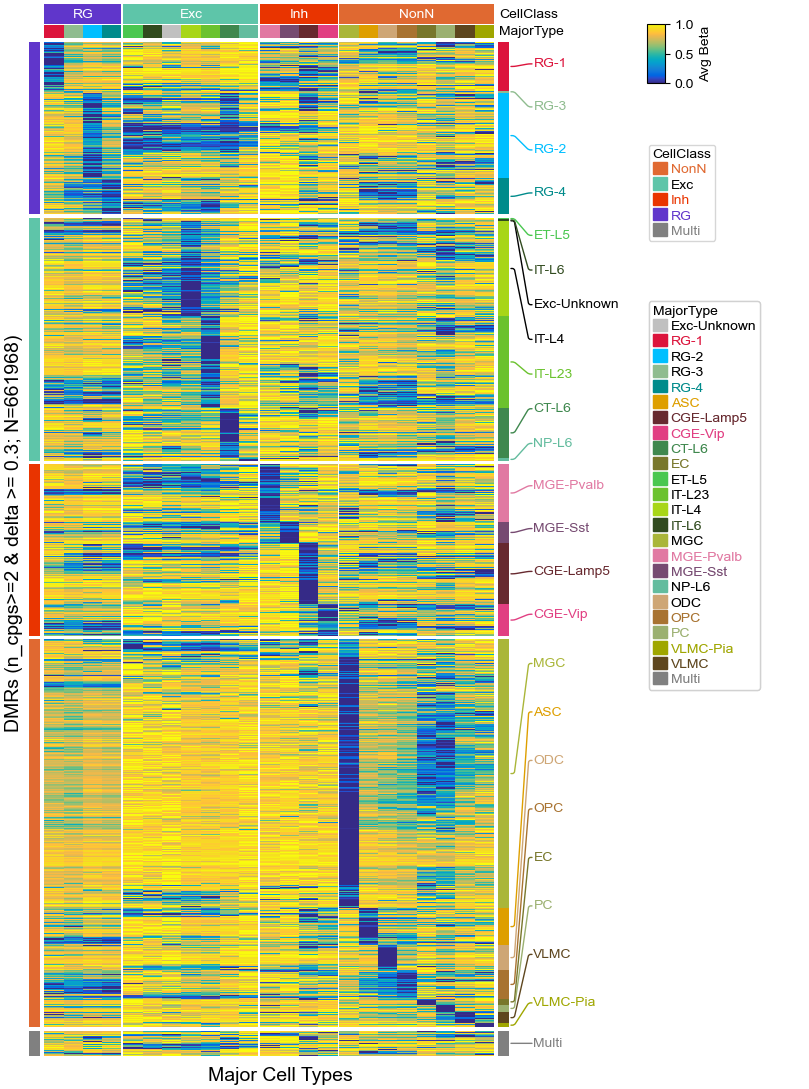

In [13]:
cell_class_colors1=cell_class_colors.copy()
cell_class_colors1['Multi']='grey'
majortype_colors1=majortype_colors.copy()
majortype_colors1['Multi']='grey'

left_ha = pch.HeatmapAnnotation(
    CellClass=pch.anno_simple(df_rows.CellClass, colors=cell_class_colors1,
                             rasterized=True,
                             # add_text=True,
                             # text_kws=dict(color='black',rotation=90)
                             ),
    axis=0,label_kws=dict(visible=False))
right_ha=pch.HeatmapAnnotation(
    MajorType=pch.anno_simple(df_rows.MajorType, colors=majortype_colors1,
                             rasterized=True,
                             ),
    label=pch.anno_label(df_rows.MajorType, merge=True,colors=majortype_colors1,
                        extend=True,relpos=(0,0.5),height=6),
    axis=0,label_kws=dict(visible=False))
col_ha = pch.HeatmapAnnotation(
    # label=pch.anno_label(df_cols.CellClass,merge=True,colors=cell_class_colors1),
    CellClass=pch.anno_simple(df_cols.CellClass, colors=cell_class_colors1,
                             rasterized=True,legend=False,
                             add_text=True,height=4.5,
                             text_kws=dict(color='white')
                             ),
    MajorType=pch.anno_simple(df_cols.MajorType,colors=majortype_colors1,
                             legend=False
                             ),
    axis=1)


plt.figure(figsize=(6.5, 12))
cm = pch.ClusterMapPlotter(data=data, top_annotation=col_ha,
                           left_annotation=left_ha, 
                           right_annotation=right_ha,
                           row_cluster=False,col_cluster=False,
                           standard_scale=0,
                           show_rownames=False, show_colnames=False,
                           row_dendrogram=False, col_dendrogram=False,
                           row_split=df_rows.CellClass,
                           col_split=df_cols.CellClass,
                           col_split_order=col_split_order,
                           row_split_order=row_split_order,
                           cmap='parula', rasterized=True, label='Avg Beta',
                           row_split_gap=0.8, col_split_gap=0.5, legend_gap=14,
                           legend_width=40,
                           xlabel="Major Cell Types", legend_hpad=0,
                           ylabel=f"DMRs (n_cpgs>=2 & delta >= 0.3; N={data.shape[0]})",
                           xlabel_kws=dict(color='black', fontsize=14, labelpad=0),
                           ylabel_kws=dict(color='black', fontsize=14, labelpad=0),
                           # xlabel_bbox_kws=dict(facecolor='chocolate'),xlabel_side='top',
                           )
# cm.ax.set_title("Beta", y=1.03, fontdict={'fontweight': 'bold'})
plt.savefig("all_dmr_heatmap.pdf", bbox_inches='tight')
plt.show()